# Data Preprocessing for GAN

## 1. Obtaining Dataset(s)

In this notebook we clean the data and prepare it for training the generative adversarial network as well as the deep reinforcement learning model.

We will be using the NSL-KDD dataset from http://205.174.165.80/CICDataset/NSL-KDD/Dataset/
Specifically, KDDTrain+.txt (the full NSL-KDD train set including attack-type labels and difficulty level in CSV format)

In [101]:
! wget http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip
! unzip NSL-KDD.zip -d dataset/MachineLearning2

--2021-11-23 03:11:22--  http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6598776 (6.3M) [application/zip]
Saving to: ‘NSL-KDD.zip.7’

NSL-KDD.zip.7       100%[===================>]   6.29M  2.42MB/s    in 2.6s    

2021-11-23 03:11:26 (2.42 MB/s) - ‘NSL-KDD.zip.7’ saved [6598776/6598776]

Archive:  NSL-KDD.zip
replace dataset/MachineLearning2/index.html? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [102]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2. Cleaning the Data

In [104]:
# to avoid converting the ARFF file to CSV, we'll manually list the labels of KDDTrain+.txt
columns = ['duration',
           'protocol_type',
           'service',
           'flag',
           'src_bytes',
           'dst_bytes',
           'land',
           'wrong_fragment',
           'urgent',
           'hot',
           'num_failed_logins',
           'logged_in',
           'num_compromised',
           'root_shell',
           'su_attempted',
           'num_root',
           'num_file_creations',
           'num_shells',
           'num_access_files',
           'num_outbound_cmds',
           'is_host_login',
           'is_guest_login',
           'count',
           'srv_count',
           'serror_rate',
           'srv_serror_rate',
           'rerror_rate',
           'srv_rerror_rate',
           'same_srv_rate',
           'diff_srv_rate',
           'srv_diff_host_rate',
           'dst_host_count',
           'dst_host_srv_count',
           'dst_host_same_srv_rate',
           'dst_host_diff_srv_rate',
           'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate',
           'dst_host_serror_rate',
           'dst_host_srv_serror_rate',
           'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate',
           'class',
           'difficulty_level' # there is a mysterious extra column in the .txt file that is unnamed in the ARFF, I think it corresponds to the difficulty level
           ]

pd.set_option("display.max_columns", None) # we want to view all columns when printing

'''
# remove unnecessary files from download
files = ['dataset/MachineLearning2/index.html',
        'dataset/MachineLearning2/KDDTest+.arff',
        'dataset/MachineLearning2/KDDTest-21.arff',
        'dataset/MachineLearning2/KDDTest-21.txt',
        'dataset/MachineLearning2/KDDTrain+.arff',
        'dataset/MachineLearning2/KDDTrain+_20Percent.arff',
        'dataset/MachineLearning2/KDDTrain+_20Percent.txt'
       ]

for f in files:
    os.remove(f)
'''
df = pd.read_csv("dataset/MachineLearning2/KDDTest+.txt")
df.to_csv('KDDTest+.csv', index = None)
df.columns = columns

df_ = pd.read_csv("dataset/MachineLearning2/KDDTrain+.txt")
df_.to_csv('KDDTrain+.csv', index = None)
df_.columns = columns
df = pd.concat([df,df_])

df.head()

#df.columns = columns
df.reset_index(drop=True, inplace=True)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


## Reformatting Column Headers

In [105]:
# removing whitespace and converting to lowercase (not required, but for completeness)

df.columns = df.columns.str.lower()
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace(' ','_')

df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulty_level'],
      dtype='object')

In [106]:
df = df.loc[:, (df != 0).any(axis=0)] # removing all columns where all values are 0

stats = df.describe()
stats

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,148515.000000,1.485150e+05,1.485150e+05,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.00000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000,148515.000000
mean,276.783032,4.022849e+04,1.708908e+04,0.000215,0.020523,0.000202,0.189382,0.004323,0.402794,0.255065,0.001508,0.000976,0.273730,0.012073,0.000525,0.004013,0.000081,0.012309,83.336128,28.252237,0.256928,0.25534,0.137942,0.138482,0.672985,0.067762,0.097443,183.927792,119.464034,0.534526,0.084104,0.145933,0.030584,0.256125,0.251308,0.136215,0.136392,19.278463
std,2460.699490,5.409648e+06,3.703550e+06,0.014677,0.240071,0.019417,2.013173,0.072249,0.490462,22.231525,0.038807,0.042389,22.689176,0.517867,0.027701,0.095257,0.008989,0.110259,116.760724,75.370097,0.431920,0.43258,0.339382,0.341778,0.436543,0.194667,0.258887,98.528779,111.232434,0.448061,0.194103,0.308639,0.108976,0.428501,0.429721,0.322735,0.335277,2.739772
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,7.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.000000,17.000000,0.850000,0.91000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,100.000000,5.000000,9.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


NORMAL percentage:  51.882301451031886  ATTACK percentage:  48.117698548968114


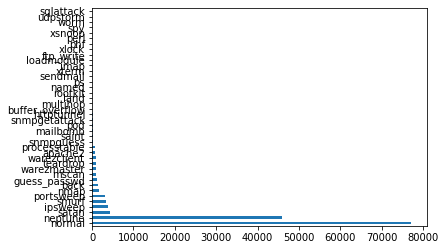

In [107]:
df['class'].value_counts().plot.barh()
benign_percentage = len(df[df['class']== 'normal'])/len(df.index)*100
attack_percentage = 100 - benign_percentage
print("NORMAL percentage: ", benign_percentage, " ATTACK percentage: ", attack_percentage)

<AxesSubplot:>

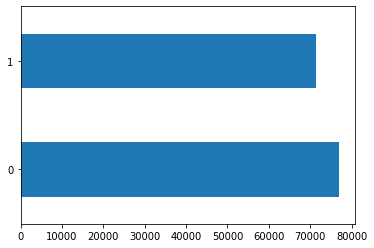

In [108]:
# As we can see above, the NORMAL count is ~52% of our cleaned data, while attack data is ~48%.

df["class"] = df["class"].map(
    lambda x: 0 if x == "normal" else 1
)

df['class'].value_counts().plot.barh()

In [109]:

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# SKIPPING NORMALIZATION
# df = normalize(df)


## 3. Train/Test/Validation Sets

In [110]:
X_train, X_test, y_train, y_test = train_test_split(             # using 15% of the data for testing
    df.iloc[:, :-1], df["class"], test_size=0.15, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(               # using 15% of the data for validation
    X_train, y_train, test_size=0.15, shuffle=True)

print("train percentage: ", len(X_train)/len(df.index) * 100, "%")
print("test percentage: ", len(X_test)/len(df.index) * 100, "%")
print("validation percentage ", len(X_val)/len(df.index) * 100, "%")

train percentage:  72.24926775073224 %
test percentage:  15.000504999495002 %
validation percentage  12.750227249772749 %


## 4. Saving the Data

In [111]:
pd.concat([X_train, y_train], axis=1).to_csv("processed_data2/train_data.csv", index=None)
pd.concat([X_test, y_test], axis=1).to_csv("processed_data2/test_data.csv", index=None)
pd.concat([X_val, y_val], axis=1).to_csv("processed_data2/validation_data.csv", index=None)

FileNotFoundError: [Errno 2] No such file or directory: 'processed_data2/train_data.csv'